## Food Scarcity

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
#
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Dante Osbourne
* Dylan Porter

**Course:** DAAN 897– Deep Learning (Spring, 2024)

### Problem Statement
* This project  .....
    
    
    
* **Keywords:** House price prediction, real estate ,..., 
	

### Data Collection
* Source(url):
* Short Description : The data set of Boston Housing from Harrison and Rubinfeld (1978)

* Keywords: House price, room, zip code

### Required packages

* Keras
* Pandas
* Numpy
* matplotlib
* scikit-learn
*kerastuner


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, InputLayer
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from kerastuner import RandomSearch

### Data Preprocessing

* Enumerate and present the main steps you preformed in the data preprocessing
* Add your code and interpret the outcome of main steps/functions


In [9]:
# Read in both datasets
climate_change_df = pd.read_csv('./data/climate_change_data.csv')
yield_df = pd.read_csv('./data/yield_df.csv')

In [10]:
# Convert the Date in the climate_change_data.csv to just the year for formatting and eventual data merging
climate_change_df['Date'] = pd.to_datetime(climate_change_df['Date'], errors='coerce')
climate_change_df['Year'] = climate_change_df['Date'].dt.year

In [11]:
#basic exploration of the climate change dataset
climate_change_df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000


In [12]:
#descriptive statistics of the climate change dataset
climate_change_df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066,2010.997900
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648,6.633634
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732,2000.000000
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733,2005.000000
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787,2011.000000
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260,2017.000000
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664,2022.000000


In [13]:
#empty check
climate_change_df.isnull().sum(axis = 0)

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
Year              0
dtype: int64

In [14]:
i = 0
for col in climate_change_df.columns:
    print(col,'has',len(np.unique(climate_change_df.iloc[:,i])),'unique values')
    i+=1

Date has 10000 unique values
Location has 7764 unique values
Country has 243 unique values
Temperature has 10000 unique values
CO2 Emissions has 10000 unique values
Sea Level Rise has 10000 unique values
Precipitation has 10000 unique values
Humidity has 10000 unique values
Wind Speed has 10000 unique values
Year has 23 unique values


<AxesSubplot:>

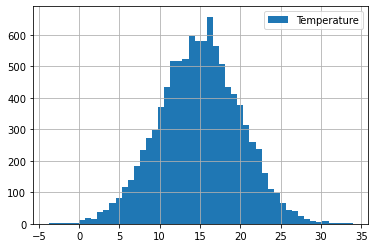

In [15]:
#Temperature histogram generation
climate_change_df.iloc[:,3].hist(legend=True,bins=50)

<AxesSubplot:>

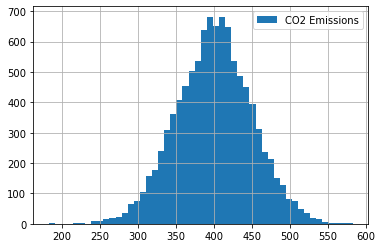

In [16]:
#CO2 histogram generation
climate_change_df.iloc[:,4].hist(legend=True,bins=50)

<AxesSubplot:>

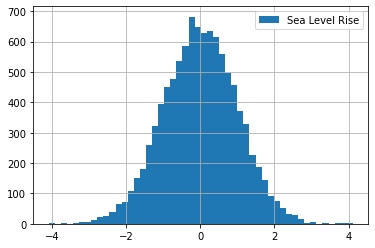

In [17]:
#Sea Level Rise histogram generation
climate_change_df.iloc[:,5].hist(legend=True,bins=50)

<AxesSubplot:>

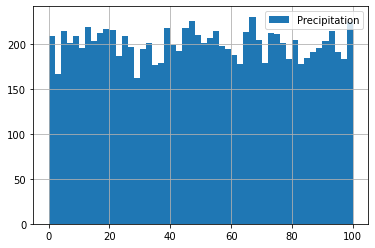

In [18]:
#Precipitation histogram generation
climate_change_df.iloc[:,6].hist(legend=True,bins=50)

<AxesSubplot:>

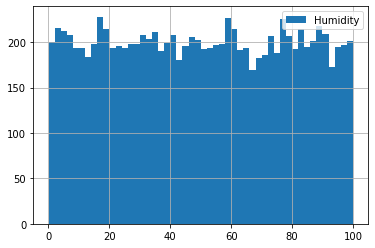

In [19]:
#Humidity histogram generation
climate_change_df.iloc[:,7].hist(legend=True,bins=50)

<AxesSubplot:>

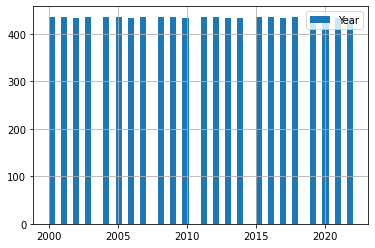

In [47]:
#Wind Speed histogram generation
climate_change_df.iloc[:,8].hist(legend=True,bins=50)

([<matplotlib.axis.YTick at 0x187b36d0400>,
 [Text(0, 0, 'CO2 Emissions'),
  Text(0, 1, 'Sea Level Rise'),
  Text(0, 2, 'Precipitation'),
  Text(0, 3, 'Humidity'),
  Text(0, 4, 'Wind Speed'),
  Text(0, 5, 'Year')])

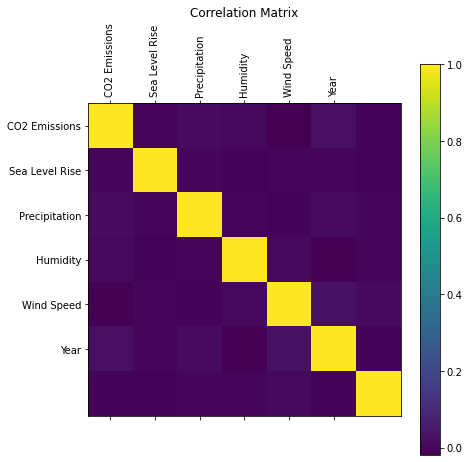

In [48]:
plt.figure(figsize=(7,7))
plt.matshow(climate_change_df.iloc[:,1:].corr(), fignum=1)
plt.title('Correlation Matrix', position = (0.5, 1.1))
plt.colorbar()
plt.xticks(range(6), list(climate_change_df.iloc[:,3:].columns), rotation = 90)
plt.yticks(range(6), list(climate_change_df.iloc[:,3:].columns))

In [21]:
#basic exploration of the yield data frame
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [22]:
#empty check
yield_df.isnull().sum(axis = 0)

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [23]:
#descriptive statistics of the yield dataset
yield_df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [24]:
#remove unnecessary column
climate_change_df = climate_change_df.drop(['Date'], axis=1)

In [25]:
#remove unnecessary column
yield_df = yield_df.drop(['Unnamed: 0'], axis=1)

In [26]:
i = 0
for col in yield_df.columns:
    print(col,'has',len(np.unique(yield_df.iloc[:,i])),'unique values')
    i+=1


Area has 101 unique values
Item has 10 unique values
Year has 23 unique values
hg/ha_yield has 11514 unique values
average_rain_fall_mm_per_year has 100 unique values
pesticides_tonnes has 1673 unique values
avg_temp has 1831 unique values


<AxesSubplot:>

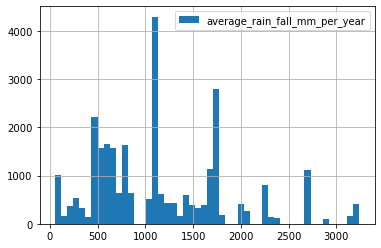

In [27]:
#yield histogram generation
yield_df.iloc[:,4].hist(legend=True,bins=50)

<AxesSubplot:>

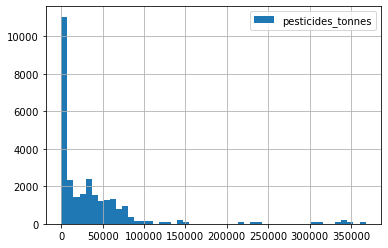

In [28]:
#average rainfall histogram generation
yield_df.iloc[:,5].hist(legend=True,bins=50)

In [29]:
# Need to average the climate change dataset because it is more granular by location when compared to the other datset.
climate_change_df_average = climate_change_df.groupby(['Country', 'Year']).mean(numeric_only=True).reset_index()

In [30]:
# Find all columns that are numeric
climate_change_df_numeric = climate_change_df_average.select_dtypes(include=[np.number])

In [31]:
# Find all columns that are numeric
yield_df_numeric = yield_df.select_dtypes(include=[np.number])

In [32]:
#outlier removal climate change
climate_change_no_outlier = climate_change_df_numeric[(np.abs(stats.zscore(climate_change_df_numeric)) < 3).all(axis=1)]

In [33]:
#outlier removal yield change
yield_df_no_outlier = yield_df_numeric[(np.abs(stats.zscore(yield_df_numeric)) < 3).all(axis=1)]

In [34]:
# Remove all rows that contained outliers
climate_change_df_average = climate_change_df.loc[climate_change_no_outlier.index]

In [35]:
# Remove all rows that contained outliers
yield_df = yield_df.loc[yield_df_no_outlier.index]

In [49]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


([<matplotlib.axis.YTick at 0x187b3b9a4c0>,
 [Text(0, 0, 'Year'),
  Text(0, 1, 'hg/ha_yield'),
  Text(0, 2, 'average_rain_fall_mm_per_year'),
  Text(0, 3, 'pesticides_tonnes'),
  Text(0, 4, 'avg_temp')])

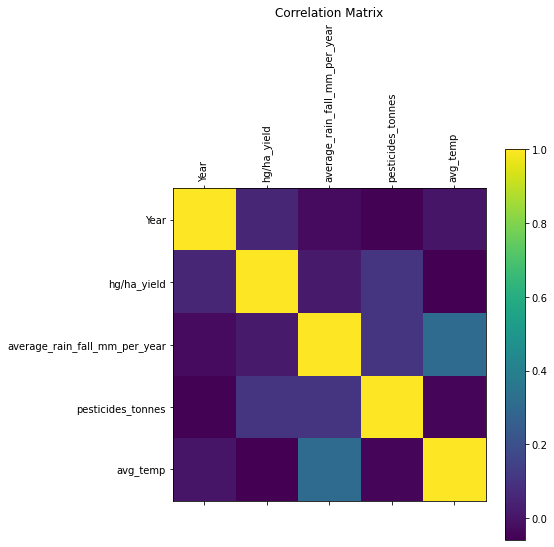

In [53]:
#look if any correlation for possible regression exercises 
plt.figure(figsize=(7,7))
plt.matshow(yield_df.iloc[:,1:].corr(), fignum=1)
plt.title('Correlation Matrix', position = (0.5, 1.1))
plt.colorbar()
plt.xticks(range(5), list(yield_df.iloc[:,2:].columns), rotation = 90)
plt.yticks(range(5), list(yield_df.iloc[:,2:].columns))

In [37]:
#merge dataset
merged_df = pd.merge(climate_change_df_average, yield_df, left_on=['Country', 'Year'], right_on=['Area', 'Year'])

In [38]:
merged_df

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,Latvia,Potatoes,145634,641.0,284.72,7.47
1,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,Latvia,Wheat,27034,641.0,284.72,7.47
2,Rachelburgh,Latvia,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,Latvia,Potatoes,145634,641.0,284.72,7.47
3,Rachelburgh,Latvia,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,Latvia,Wheat,27034,641.0,284.72,7.47
4,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,South Africa,Maize,28492,495.0,26857.00,20.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18430,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,20.33
18431,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,12.37
18432,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,14.23
18433,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,19.09


### Methodology

1. Explan your Deep Learning process / methodology



2. Introduce the Deep Neural Networks you used in your project
 * Model 1
    * Description 
 
 * Model 2
    * Description
 
 * Ensemble method
     * Description 
 
 
3. Add keywords  
**Keywords:** natural language processing, sentiment analysis, clustering, binary classification, multi-label classification, prediction
	___
 **Example**
* ConvNet
    * A convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery(source Wikipedia). 
 
* **Keywords:** supervised learning, classification, ...

### Model Fitting and Validation

1. model 1 
    - decription 
2. model 2
    - decription 

In [39]:
# One-hot encode country
X = pd.get_dummies(merged_df, columns=['Country'])

X = pd.get_dummies(X, columns=['Item'])

# X is all the fields that predict hg/ha_yield
X = X.drop('hg/ha_yield', axis=1)
X = X.drop('Location', axis=1)
X = X.drop('Area', axis=1)
Y = merged_df['hg/ha_yield']


In [40]:
X

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,641.0,284.72,7.47,...,0,0,0,1,0,0,0,0,0,0
1,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,641.0,284.72,7.47,...,0,0,0,0,0,0,0,0,1,0
2,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,641.0,284.72,7.47,...,0,0,0,1,0,0,0,0,0,0
3,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,641.0,284.72,7.47,...,0,0,0,0,0,0,0,0,1,0
4,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,495.0,26857.00,20.74,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18430,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,20.33,...,0,0,0,0,0,0,0,0,1,0
18431,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,12.37,...,0,0,0,0,0,0,0,0,1,0
18432,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,14.23,...,0,0,0,0,0,0,0,0,1,0
18433,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,19.09,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# Standardize the dataset to feed into the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)


In [43]:
def build_model(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))

    # Create a variable number of layers between 2 and 5 along with an associated Dropout layer
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    # Regression so just one unit needed
    model.add(Dense(1))

    # Adjust the learning rate dynamically, go off of val_loss for mean_squared_error
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

### Model Evaluation 

* Examine your models (coefficients, parameters, errors, etc...)

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc. 

In [44]:
# Find the optimal hyperparameters via keras tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=160,
    executions_per_trial=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

NameError: name 'RandomSearch' is not defined

In [45]:
tuner.search(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32)
best_model = tuner.get_best_models(num_models=1)[0]


NameError: name 'tuner' is not defined

Epoch 1/100
369/369 [==============================] - 1s 2ms/step - loss: 5155913216.0000 - val_loss: 1118935936.0000
Epoch 2/100
369/369 [==============================] - 1s 2ms/step - loss: 997740032.0000 - val_loss: 839906688.0000
Epoch 3/100
369/369 [==============================] - 1s 2ms/step - loss: 842750272.0000 - val_loss: 722420992.0000
Epoch 4/100
369/369 [==============================] - 1s 2ms/step - loss: 733616192.0000 - val_loss: 648330368.0000
Epoch 5/100
369/369 [==============================] - 1s 2ms/step - loss: 677940352.0000 - val_loss: 593148288.0000
Epoch 6/100
369/369 [==============================] - 1s 2ms/step - loss: 616512768.0000 - val_loss: 528825728.0000
Epoch 7/100
369/369 [==============================] - 1s 2ms/step - loss: 549415616.0000 - val_loss: 451156672.0000
Epoch 8/100
369/369 [==============================] - 1s 2ms/step - loss: 480700096.0000 - val_loss: 378387456.0000
Epoch 9/100
369/369 [==============================] - 1s 2ms/

Epoch 71/100
369/369 [==============================] - 1s 2ms/step - loss: 118862288.0000 - val_loss: 57536204.0000
Epoch 72/100
369/369 [==============================] - 1s 2ms/step - loss: 118875808.0000 - val_loss: 66570924.0000
Epoch 73/100
369/369 [==============================] - 1s 2ms/step - loss: 125198376.0000 - val_loss: 62363448.0000
Epoch 74/100
369/369 [==============================] - 1s 2ms/step - loss: 117025176.0000 - val_loss: 74675152.0000
Epoch 75/100
369/369 [==============================] - 1s 2ms/step - loss: 124905184.0000 - val_loss: 58605180.0000
Epoch 76/100
369/369 [==============================] - 1s 2ms/step - loss: 130738320.0000 - val_loss: 61076520.0000
Epoch 77/100
369/369 [==============================] - 1s 2ms/step - loss: 116473080.0000 - val_loss: 60198004.0000
Epoch 78/100
369/369 [==============================] - 1s 2ms/step - loss: 113085288.0000 - val_loss: 61950416.0000
Epoch 79/100
369/369 [==============================] - 1s 2ms/s

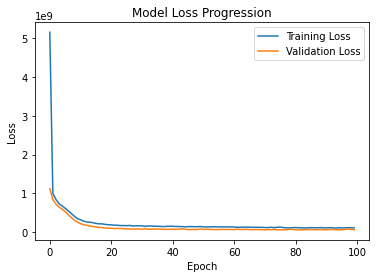

In [61]:
# Best model based on keras tuner
model = Sequential()

model.add(Dense(384, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(448, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.1)))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Issues / Improvements
1. Dataset is very small
2. Use regularization / initialization
3. Use cross-validaiton
4. ...

###  References
   - Academic (if any)
   - Online (if any)
	

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. Keep in mind that all documents in your projects and code will be check against the official plagiarism detection tool used by Penn State ([Turnitin](https://turnitin.psu.edu))

> *This code is based on .... (if any)*

In [ ]:
# End of Project